In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
boston_data_set = load_boston()
print(str(boston_data_set['DESCR']))

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [3]:
feature_names = boston_data_set['feature_names']
X = boston_data_set['data']
y = boston_data_set['target']

In [4]:
boston_dataframe = pd.DataFrame(X, columns=feature_names)
boston_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [5]:
boston_dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


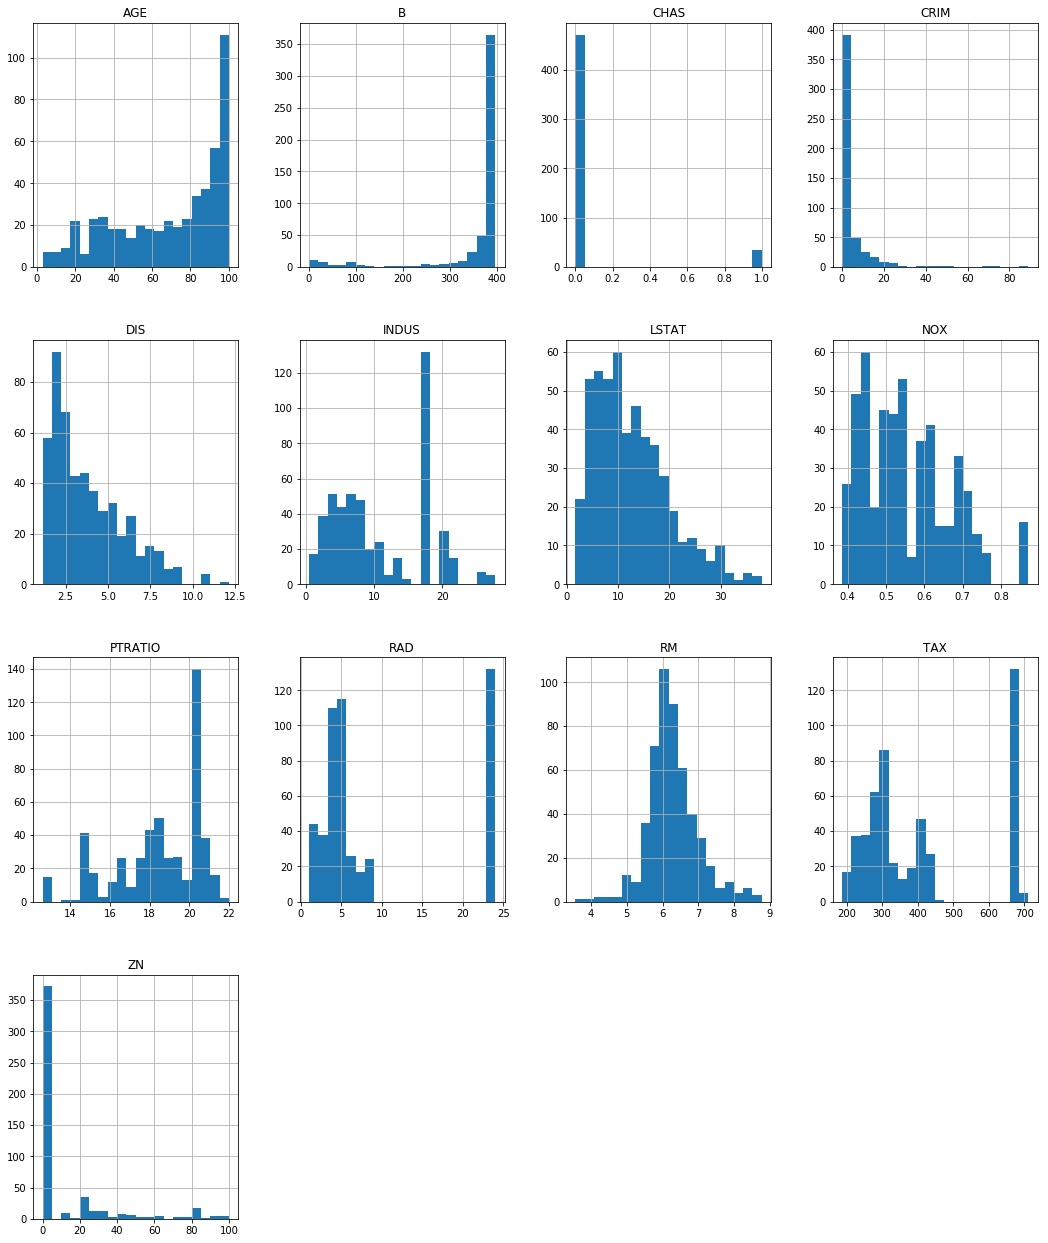

In [6]:
from pandas.plotting import scatter_matrix
boston_dataframe[feature_names].hist(bins=20,figsize=(18,22))
plt.show()

In [15]:
# Create a correlation matrix to see what features may be connected.
boston_cm = boston_dataframe.corr()
boston_cm['DIS'].sort_values(ascending=False) # compare to distance from employment centers

DIS        1.000000
ZN         0.664408
B          0.291512
RM         0.205246
CHAS      -0.099176
PTRATIO   -0.232471
CRIM      -0.377904
RAD       -0.494588
LSTAT     -0.496996
TAX       -0.534432
INDUS     -0.708027
AGE       -0.747881
NOX       -0.769230
Name: DIS, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113831c50>,
      dtype=object)

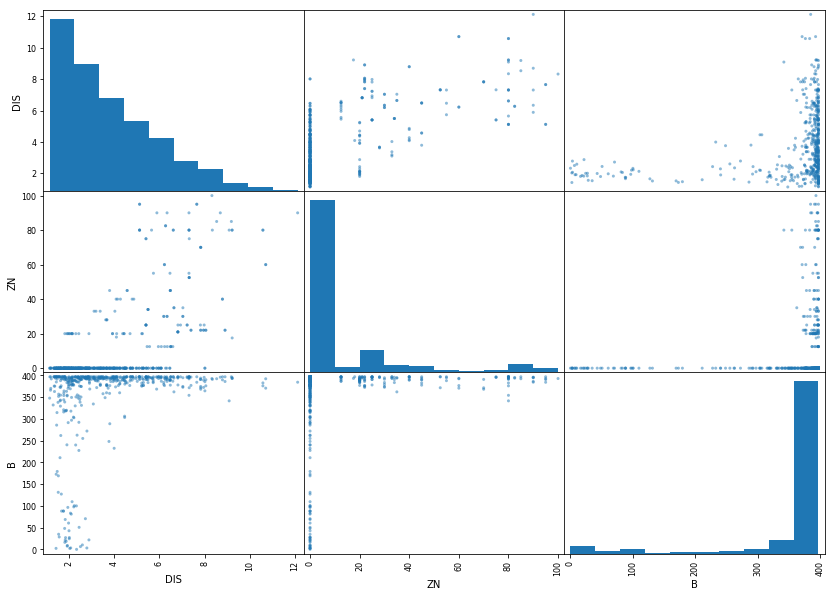

In [17]:
candidate_names=['DIS', 'ZN', 'B']
scatter_matrix(boston_dataframe[candidate_names], figsize=(14,10))

In [9]:
# Prep the data for learning the model
from sklearn.model_selection import train_test_split
# Hold back 20% for test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [10]:
# It is clear from the histograms, we need to scale this data during training and testing.
# This exercise will compare and contrast Lasso and Ridge regression (ElasticNet for grins later).
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error

In [20]:
# Setup a pipeline to scale and fit the data and run through the GridSearchCV process
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

ridge_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('ridge_reg', Ridge(tol=1e-3,alpha=1))
])

ridge_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge_reg', Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [27]:
named_ridge_coefs_df = pd.DataFrame({'labels':feature_names, 'coefs':ridge_pipeline.named_steps['ridge_reg'].coef_})
named_ridge_coefs_df

,coefs,labels
0,-1.054219,CRIM
1,1.254991,ZN
2,-0.004064,INDUS
3,0.647746,CHAS
4,-2.104951,NOX
5,2.483430,RM
6,0.150803,AGE
7,-3.293327,DIS
8,3.018160,RAD
9,-2.191258,TAX


In [29]:
lasso_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('lasso_reg', Lasso(tol=1e-3,alpha=1))
])

lasso_pipeline.fit(X_train, y_train)
named_lasso_coefs_df = pd.DataFrame({'labels':feature_names, 'coefs': lasso_pipeline.named_steps['lasso_reg'].coef_})
named_lasso_coefs_df

,coefs,labels
0,-0.000000,CRIM
1,0.000000,ZN
2,-0.000000,INDUS
3,0.065288,CHAS
4,-0.000000,NOX
5,2.570099,RM
6,-0.000000,AGE
7,-0.000000,DIS
8,-0.000000,RAD
9,-0.000000,TAX


In [130]:
# Simply predict and compute RMSE. Print the value and some sample results.
def compute_metrics(model,X,y_test):
    y_pred = model.predict(X)
    mse = mean_squared_error(y_pred, y_test)
    print("RMSE = " + str(np.sqrt(mse)))
    print("Predicted: " + str(y_pred[0:5]))
    print("Truth: " + str(y_test[0:5]))
    
# Learning curve plotting function
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors = []
    val_errors = []
    
    # Train and predict for data sets from 1 to the size of the training set
    for i in range(1, len(X_train)):
        X_curr = X_train[:i]
        y_curr = y_train[:i]
        model.fit(X_curr, y_curr)
        # Make a prediction using this training set
        y_train_pred = model.predict(X_curr)
        # Predict the result of using the whole validation set
        y_val_pred = model.predict(X_val)
        
        train_errors.append( mean_squared_error(y_train_pred, y_curr) )
        val_errors.append( mean_squared_error(y_val_pred, y_val) )
    
    plt.plot(np.sqrt( train_errors ), "r--+", linewidth=2, label="Training data")
    plt.plot(np.sqrt( val_errors ), "b-", linewidth=3, label="Testing data")
    plt.xlim(xmin=0, xmax=len(X_train)+2)
    plt.ylim(ymin=0, ymax=10)
    plt.show()

In [123]:
# Interesting! Lasso performed as expected: some feature coefficients go to 0. Thus, they may not
# have as much impact on the model. Time to compare the models with some metrics...
from sklearn.metrics import mean_squared_error

compute_metrics(ridge_pipeline, X_test, y_test)

RMSE = 4.848576368215461
Predicted: [21.68301982 18.16880967 27.82613133  7.52137864 26.51297201]
Truth: [20.4 16.5 23.1 14.4 24.6]


In [124]:
# How about lasso?
compute_metrics(lasso_pipeline, X_test, y_test)

RMSE = 4.833766588854798
Predicted: [23.3766331  13.20191207 26.94201077  5.00729344 26.93172234]
Truth: [20.4 16.5 23.1 14.4 24.6]


In [45]:
# Still not great!
from sklearn.model_selection import cross_val_score

ridge_scores = cross_val_score(ridge_pipeline, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
lasso_scores = cross_val_score(lasso_pipeline, X_train, y_train, scoring='neg_mean_squared_error', cv=10)

In [125]:
print("Ridge mean RMSE (CV) " + str(np.sqrt(-ridge_scores).mean()))
print("Lasso mean RMSE (CV) " + str(np.sqrt(-lasso_scores).mean()))

Ridge mean RMSE (CV) 4.885715275037804
Lasso mean RMSE (CV) 5.406441622095572


In [115]:
from sklearn.model_selection import GridSearchCV

ridge_param_grid = [{
    'ridge_reg__alpha':np.linspace(0.1,10,num=10)
}]

ridge_gcv = GridSearchCV(ridge_pipeline,param_grid=ridge_param_grid,scoring='neg_mean_squared_error',cv=5,verbose=1)
ridge_gcv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('ridge_reg', Ridge(alpha=7.8, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'ridge_reg__alpha': array([ 0.1,  1.2,  2.3,  3.4,  4.5,  5.6,  6.7,  7.8,  8.9, 10. ])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [126]:
ridge_reg_best = ridge_gcv.best_estimator_
print(ridge_reg_best)
compute_metrics(ridge_reg_best, X_test, y_test)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('ridge_reg', Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])
RMSE = 4.991464956538299
Predicted: [21.47568155 19.45934876 28.6277071   7.67159056 26.47404685]
Truth: [20.4 16.5 23.1 14.4 24.6]


In [63]:
# A little better! How about Lasso with GridSearchCV?
lasso_param_grid = [{
    'lasso_reg__alpha':np.linspace(0.1,10,num=10)
}]

lasso_gcv = GridSearchCV(lasso_pipeline,param_grid=lasso_param_grid,scoring='neg_mean_squared_error',cv=5,verbose=1)
lasso_gcv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso_reg', Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.001, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'lasso_reg__alpha': array([ 0.1,  1.2,  2.3,  3.4,  4.5,  5.6,  6.7,  7.8,  8.9, 10. ])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [127]:
lasso_reg_best = lasso_gcv.best_estimator_
print(lasso_reg_best)
compute_metrics(lasso_reg_best, X_test, y_test)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso_reg', Lasso(alpha=0.020000000000000004, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.001, warm_start=False))])
RMSE = 4.480132087528435
Predicted: [22.95751871 10.68699828 25.46399323  3.17707838 29.36227702]
Truth: [20.4 16.5 23.1 14.4 24.6]


In [71]:
# What if we reduce the dimensionality with PCA?
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X_train)

In [72]:
pca.explained_variance_ratio_

array([0.80486356, 0.16392504, 0.02151888])

In [85]:
# Let's pop this pca into the pipeline and see how it goes.
ridge_pipeline2 = Pipeline([
    ('std_scaler', StandardScaler()),
    ('pca', PCA()),
    ('ridge_reg', Ridge(tol=1e-3))
])

rpg2 = [{
    'pca__n_components':[1,2,3,4,5],
    'ridge_reg__alpha':[0.05, 0.1, 0.15, 0.2, 0.4, 0.8]
}]

rp2_gcv = GridSearchCV(ridge_pipeline2,param_grid=rpg2,scoring='neg_mean_squared_error',cv=5,verbose=1)
rp2_gcv.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('ridge_reg', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'pca__n_components': [1, 2, 3, 4, 5], 'ridge_reg__alpha': [0.05, 0.1, 0.15, 0.2, 0.4, 0.8]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [128]:
rp2_best = rp2_gcv.best_estimator_
compute_metrics(rp2_best,X_test, y_test)

RMSE = 4.3854828464673155
Predicted: [22.78660799 13.73353177 26.32097298  4.52314699 27.6039647 ]
Truth: [20.4 16.5 23.1 14.4 24.6]


In [117]:
# Try an elastic net
from sklearn.linear_model import ElasticNet

elastic_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('pca', PCA()),
    ('elastic_reg', ElasticNet(tol=1e-3))
])

elastic_param_grid = [{
    'pca__n_components':[1,2,3,4,5,6],
    'elastic_reg__alpha':np.linspace(0.1,1,num=10),
    'elastic_reg__l1_ratio':[0.1,0.3,0.5,0.6,0.8,0.9]
}]

elastic_gcv = GridSearchCV(elastic_pipeline,param_grid=elastic_param_grid, scoring='neg_mean_squared_error',cv=5,verbose=1)
elastic_gcv.fit(X_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:    5.1s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('elastic_reg', ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.001, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'pca__n_components': [1, 2, 3, 4, 5, 6], 'elastic_reg__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), 'elastic_reg__l1_ratio': [0.1, 0.3, 0.5, 0.6, 0.8, 0.9]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [129]:
ereg_best = elastic_gcv.best_estimator_
print(ereg_best)
compute_metrics(ereg_best, X_test, y_test)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('elastic_reg', ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.001, warm_start=False))])
RMSE = 4.355435434101431
Predicted: [22.90493429 14.83876582 26.5096903   6.08974914 27.43859972]
Truth: [20.4 16.5 23.1 14.4 24.6]


/Users/pjmartin/Code/python-ml-sandbox/lib/python3.6/site-packages/sklearn/decomposition/pca.py:423: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ = (S ** 2) / (n_samples - 1)


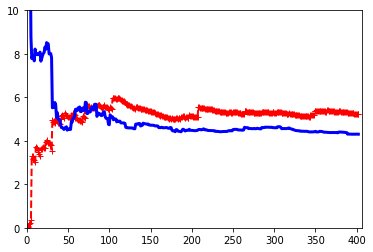

In [120]:
plot_learning_curves(ereg_best, X, y)

In [ ]:
# Although the error was reduced as we incorporated tools, it appears this data set is not 
# good to apply linear models. We should investigate nonlinear models...